In [1]:
##### Problem 1.1 #####
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# read in landscape image
img1_3d = cv2.imread('/Users/piper/Piper Documents/Biomedical Imaging/Assignments/Assignment 3/DataRaw/P1_landscape.jpg')
img1_3d = cv2.cvtColor(img1_3d, cv2.COLOR_BGR2RGB)
img1_dims = img1_3d.shape

# add position information to image data
indices1 = np.dstack(np.indices(img1_3d.shape[:2]))
indices1 += 1
img1_5d = np.concatenate((img1_3d, indices1), axis=-1)

# flatten images 
data1_3d = np.reshape(img1_3d, [-1, 3])
data1_5d = np.reshape(img1_5d, [-1, 5])

# find bandwidths
bw1_3d = estimate_bandwidth(data1_3d, quantile = 0.1, 
                           n_samples = 300) 
bw1_5d = estimate_bandwidth(data1_5d, quantile = 0.1, 
                           n_samples = 300)

# apply mean shift algorithm
ms1_3d = MeanShift(bandwidth = bw1_3d, bin_seeding = True)
ms1_3d.fit(data1_3d)
ms1_5d = MeanShift(bandwidth = bw1_5d, bin_seeding = True)
ms1_5d.fit(data1_5d)

# labels of segmented images
labs1_3d = ms1_3d.labels_
labs1_5d = ms1_5d.labels_

# cluster centers
clust1_3d = ms1_3d.cluster_centers_
clust1_5d = ms1_5d.cluster_centers_


In [2]:
# number of segments for each image
np.unique(labs1_3d)


array([0, 1, 2, 3, 4, 5])

In [3]:
np.unique(labs1_5d)


array([0, 1, 2, 3, 4])

In [4]:
# obtain segmented images
segment1_3d = clust1_3d[np.reshape(labs1_3d, img1_dims[:2])]
segment1_5d = clust1_5d[np.reshape(labs1_5d, img1_dims[:2])][:,:,:3]


In [5]:
# read in mushroom image
img2_3d = cv2.imread('/Users/piper/Piper Documents/Biomedical Imaging/Assignments/Assignment 3/DataRaw/P1_mushroom.jpg')
img2_3d = cv2.cvtColor(img2_3d, cv2.COLOR_BGR2RGB)

img2_dims = img2_3d.shape

# add position information to image data
indices2 = np.dstack(np.indices(img2_3d.shape[:2]))
indices2 += + 1
img2_5d = np.concatenate((img2_3d, indices2), axis=-1)

# flatten images 
data2_3d = np.reshape(img2_3d, [-1, 3])
data2_5d = np.reshape(img2_5d, [-1, 5])

# find bandwidths
bw2_3d = estimate_bandwidth(data2_3d, quantile = 0.1, 
                           n_samples = 300) 
bw2_5d = estimate_bandwidth(data2_5d, quantile = 0.1, 
                           n_samples = 300)

# apply mean shift algorithm
ms2_3d = MeanShift(bandwidth = bw2_3d, bin_seeding = True)
ms2_3d.fit(data2_3d)
ms2_5d = MeanShift(bandwidth = bw2_5d, bin_seeding = True)
ms2_5d.fit(data2_5d)

# labels of segmented images
labs2_3d = ms2_3d.labels_
labs2_5d = ms2_5d.labels_

# cluster centers
clust2_3d = ms2_3d.cluster_centers_
clust2_5d = ms2_5d.cluster_centers_


In [6]:
# number of segments for each image
np.unique(labs2_3d)


array([0, 1, 2])

In [7]:
np.unique(labs2_5d)


array([0, 1, 2, 3])

In [8]:
# obtain segmented images
segment2_3d = clust2_3d[np.reshape(labs2_3d, img2_dims[:2])]
segment2_5d = clust2_5d[np.reshape(labs2_5d, img2_dims[:2])][:,:,:3]


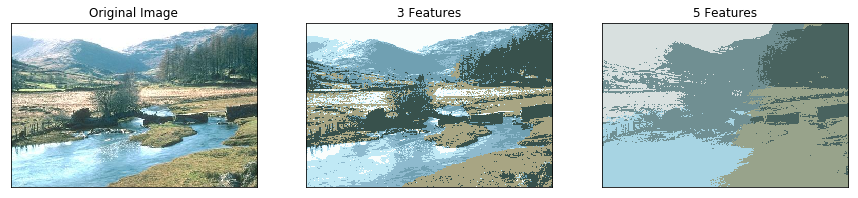

In [9]:
# show all iamges 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15,15))
ax1.imshow(img1_3d)
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('Original Image')
ax2.imshow(segment1_3d.astype(np.uint8))
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('3 Features')
ax3.imshow(segment1_5d.astype(np.uint8))
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('5 Features')
plt.show()


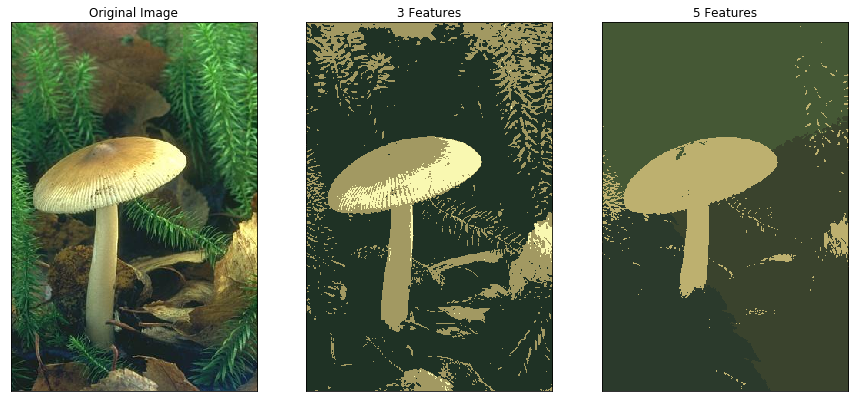

In [10]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15,15))
ax1.imshow(img2_3d)
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('Original Image')
ax2.imshow(segment2_3d.astype(np.uint8))
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('3 Features')
ax3.imshow(segment2_5d.astype(np.uint8))
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('5 Features')
plt.show()


In [11]:
##### Problem 1.2 #####
# three bandwidths for landscape image
bw1_small = estimate_bandwidth(data1_5d, quantile = 0.05, 
                               n_samples = 300)
bw1_med = estimate_bandwidth(data1_5d, quantile = 0.1, 
                               n_samples = 300)
bw1_large = estimate_bandwidth(data1_5d, quantile = 0.2, 
                               n_samples = 300)

# three bandwidths for mushroom image
bw2_small = estimate_bandwidth(data2_5d, quantile = 0.05, 
                               n_samples = 300)
bw2_med = estimate_bandwidth(data2_5d, quantile = 0.1, 
                               n_samples = 300)
bw2_large = estimate_bandwidth(data2_5d, quantile = 0.2, 
                               n_samples = 300)

# apply mean shift algorithm
ms1_small = MeanShift(bandwidth = bw1_small, bin_seeding = True)
ms1_small.fit(data1_5d)
ms1_med = MeanShift(bandwidth = bw1_med, bin_seeding = True)
ms1_med.fit(data1_5d)
ms1_large = MeanShift(bandwidth = bw1_large, bin_seeding = True)
ms1_large.fit(data1_5d)

ms2_small = MeanShift(bandwidth = bw2_small, bin_seeding = True)
ms2_small.fit(data2_5d)
ms2_med = MeanShift(bandwidth = bw2_med, bin_seeding = True)
ms2_med.fit(data2_5d)
ms2_large = MeanShift(bandwidth = bw2_large, bin_seeding = True)
ms2_large.fit(data2_5d)

# labels of segmented images
labs1_small = ms1_small.labels_
labs1_med = ms1_med.labels_
labs1_large = ms1_large.labels_
labs2_small = ms2_small.labels_
labs2_med = ms2_med.labels_
labs2_large = ms2_large.labels_

# cluster centers
clust1_small = ms1_small.cluster_centers_
clust1_med = ms1_med.cluster_centers_
clust1_large = ms1_large.cluster_centers_
clust2_small = ms2_small.cluster_centers_
clust2_med = ms2_med.cluster_centers_
clust2_large = ms2_large.cluster_centers_

segment1_small = clust1_small[np.reshape(labs1_small, img1_dims[:2])][:,:,:3]
segment1_med = clust1_med[np.reshape(labs1_med, img1_dims[:2])][:,:,:3]
segment1_large = clust1_large[np.reshape(labs1_large, img1_dims[:2])][:,:,:3]

segment2_small = clust2_small[np.reshape(labs2_small, img2_dims[:2])][:,:,:3]
segment2_med = clust2_med[np.reshape(labs2_med, img2_dims[:2])][:,:,:3]
segment2_large = clust2_large[np.reshape(labs2_large, img2_dims[:2])][:,:,:3]


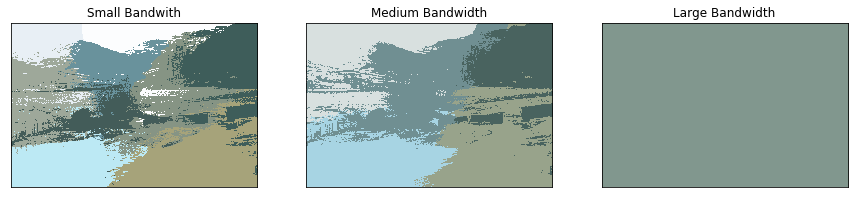

In [12]:
# combine all segmented images into one image 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15,15))
ax1.imshow(segment1_small.astype(np.uint8))
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('Small Bandwith')
ax2.imshow(segment1_med.astype(np.uint8))
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('Medium Bandwidth')
ax3.imshow(segment1_large.astype(np.uint8))
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('Large Bandwidth')
plt.show()


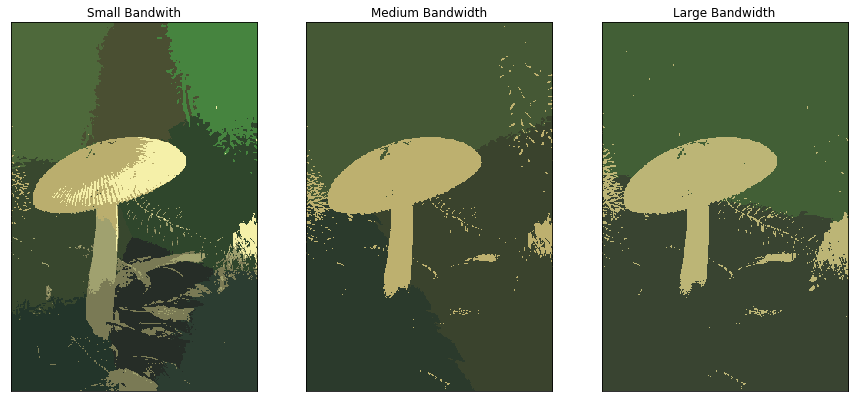

In [13]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15,15))
ax1.imshow(segment2_small.astype(np.uint8))
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('Small Bandwith')
ax2.imshow(segment2_med.astype(np.uint8))
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('Medium Bandwidth')
ax3.imshow(segment2_large.astype(np.uint8))
ax3.set_xticks([]), ax3.set_yticks([])
ax3.set_title('Large Bandwidth')
plt.show()


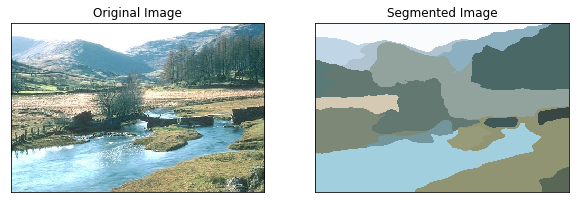

In [14]:
##### Problem 2 #####
from skimage import data, io, segmentation, color
from skimage.future import graph

# smooth image
img1_smooth = cv2.GaussianBlur(img1_3d, (15,15), 5)

# normalized cut image segmentation
labs_1 = segmentation.slic(img1_smooth)
g = graph.rag_mean_color(img1_smooth, labs_1, mode='similarity')
labs_2 = graph.cut_normalized(labs_1, g)
segment_norm1 = color.label2rgb(labs_2, img1_smooth, kind='avg')

# show original and segmented image
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (10,10))
ax1.imshow(img1_3d)
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('Original Image')
ax2.imshow(segment_norm1)
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('Segmented Image')
plt.show()


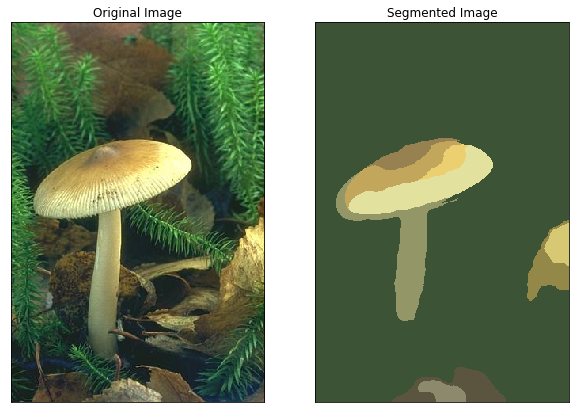

In [15]:
# smooth image
img2_smooth = cv2.GaussianBlur(img2_3d, (15,15), 5)

# normalized cut image segmentation
labs_1 = segmentation.slic(img2_smooth)
g = graph.rag_mean_color(img2_smooth, labs_1, mode='similarity')
labs_2 = graph.cut_normalized(labs_1, g)
segment_norm2 = color.label2rgb(labs_2, img2_smooth, kind='avg')

# show original and segmented image
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (10,10))
ax1.imshow(img2_3d)
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('Original Image')
ax2.imshow(segment_norm2)
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('Segmented Image')
plt.show()


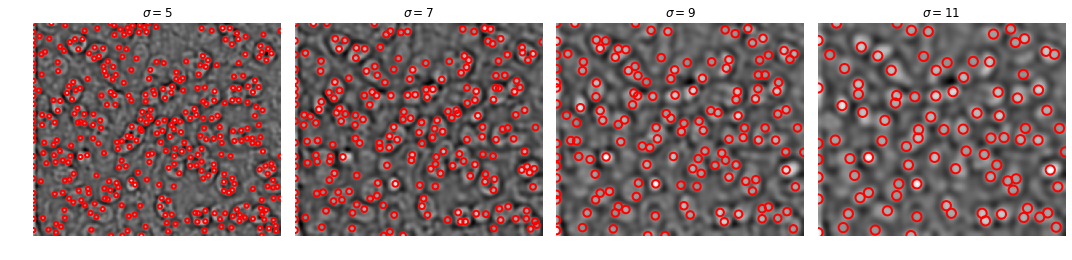

In [16]:
##### Problem 3 #####
from skimage.feature import blob_log
from scipy import ndimage

nuclei_img = cv2.imread('/Users/piper/Piper Documents/Biomedical Imaging/Assignments/Assignment 3/DataRaw/P3_nuclei.png')
nuclei_img2 = cv2.imread('/Users/piper/Piper Documents/Biomedical Imaging/Assignments/Assignment 3/DataRaw/P3_nuclei.png',0)
nuclei_img_gray = ~nuclei_img2

# blob detection via LoG filter of various sigma values
bl5 = blob_log(nuclei_img_gray, min_sigma = 5, 
               max_sigma = 5, threshold = 0.04)
bl7 = blob_log(nuclei_img_gray, min_sigma = 7, 
               max_sigma = 7, threshold = 0.04)
bl9 = blob_log(nuclei_img_gray, min_sigma = 9, 
               max_sigma = 9, threshold = 0.04)
bl11 = blob_log(nuclei_img_gray, min_sigma = 11, 
                max_sigma = 11, threshold = 0.04)
bl13 = blob_log(nuclei_img_gray, min_sigma = 13, 
                max_sigma = 13, threshold = 0.04)
bl15 = blob_log(nuclei_img_gray, min_sigma = 15, 
                max_sigma = 15, threshold = 0.04)
bl17 = blob_log(nuclei_img_gray, min_sigma = 17, 
                max_sigma = 17, threshold = 0.04)

#generate normalized LoG-filtered images
img5 = ndimage.gaussian_laplace((255-nuclei_img_gray)/255, sigma = 5)
img7 = ndimage.gaussian_laplace((255-nuclei_img_gray)/255, sigma = 7)
img9 = ndimage.gaussian_laplace((255-nuclei_img_gray)/255, sigma = 9)
img11 = ndimage.gaussian_laplace((255-nuclei_img_gray)/255, sigma = 11)
img13 = ndimage.gaussian_laplace((255-nuclei_img_gray)/255, sigma = 13)
img15 = ndimage.gaussian_laplace((255-nuclei_img_gray)/255, sigma = 15)
img17 = ndimage.gaussian_laplace((255-nuclei_img_gray)/255, sigma = 17)

# generate images
imgs_list = [img5, img7, img9, img11]
blobs_list = [bl5, bl7, bl9, bl11]
colors = ['red', 'red', 'red', 'red']
titles = ['$\sigma = 5$', '$\sigma = 7$', '$\sigma = 9$', '$\sigma = 11$']
sequence = zip(imgs_list, blobs_list, colors, titles)

fig, axes = plt.subplots(1, 4, figsize=(15, 15), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (img, blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img, interpolation='nearest', cmap = 'gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()


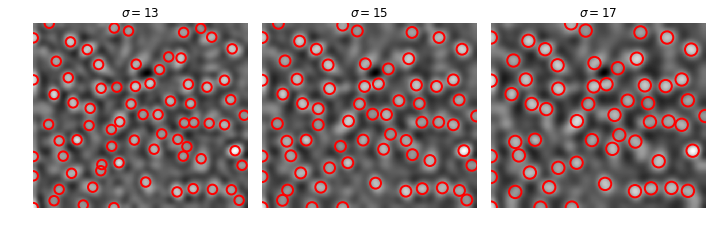

In [17]:
imgs_list = [img13, img15, img17]
blobs_list = [bl13, bl15, bl17]
colors = ['red', 'red', 'red']
titles = ['$\sigma = 13$', '$\sigma = 15$','$\sigma = 17$']
sequence = zip(imgs_list, blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(10, 15), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (img, blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img, interpolation='nearest', cmap = 'gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()
